In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [70]:
df = pd.read_excel("peptide-111_119 -4Cfold_PppiB_Febr2021_2.xlsx", skiprows=[0, 1], header=[0])

df = df.dropna(how='any')
df.size
len(df.index)

734

In [71]:
df = pd.read_excel("peptide-111_119 -4Cfold_PppiB_Febr2021_2.xlsx", skiprows=[0, 1], header=[0])
df = df.dropna(how='any')

series_dict = {}
for i, col in enumerate(df):
    if i % 2 == 0:
        idx = df.iloc[:, i]
        data = df.iloc[:, i + 1]
        data.index = idx
        data /= np.trapz(data, data.index)

        series_dict[data.name] = data

In [72]:
series_dict.keys()

dict_keys(['FD_1', 'FD_2', 'FD_3', 'T0_1', 'T0_2', 'T0_3', 'T0_4', '5sec_1', '5sec_2', '10sec_1', '10sec_2', '10sec_3', '20sec_1', '20sec_2', '20sec_3', '20sec_4', '20sec_5', '30sec_1', '30sec_2', '30sec_3', '40sec_1', '40sec_2', '1min)_1', '1min_2', '1min_3', '2.5min_1', '2.5min_2', '2.5min_3', '5min_1', '5min_2', '5min_3', '10min_1', '10min_2', '10min_3', '15min_1', '15min_2', '15min_3', '20min_1', '30min_1', 'Native_1', 'Native_2', 'Native_3'])

In [94]:
s = series_dict['30min_2']
fig, ax = plt.subplots()
ax.plot(s.index, s)


KeyError: '30min_2'

In [92]:
centroid = np.average(s.index, weights=s)
centroid

462.532923049978

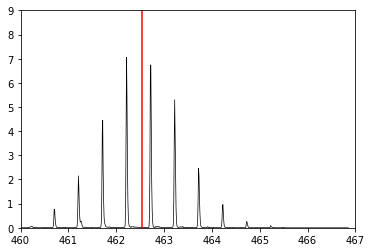

In [93]:
fig, ax = plt.subplots()
ax.plot(s.index, s, color ='k', linewidth=0.7)
#ax.scatter(xp, yp, color='r')
#ax.plot(x_vec, y_vec[0],color='r')
ax.set_ylim(0,9)
ax.set_xlim(460,467)
ax.axvline(centroid, color='r')
plt.savefig('4C_111_119_30min_centr.png')
